# Linear regression model

In [2]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../')
from src.make_dataset import generate_data
from src.functions import gradient_descent, prediction

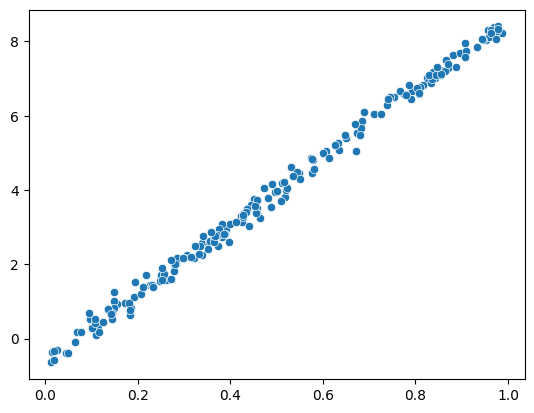

In [3]:
x_features, y_targets = generate_data(200, coeff=False, seed=10)
sns.scatterplot(x=x_features, y=y_targets)
plt.show()

## Linear regression in NumPy

In [18]:
a_model, b_model, _, coeff_history = gradient_descent(
    x_features,
    y_targets,
    n_iter=500,
    alpha=0.1
)
print(f'Coefficients determined by NumPy implementation: \n'
      f'a = {a_model:.2f} \nb = {b_model:.2f}')

Coefficients determined by NumPy implementation: 
a = 9.17 
b = -0.62


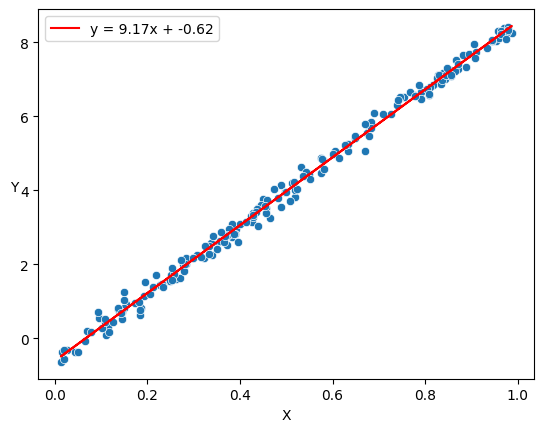

In [19]:
sns.scatterplot(x=x_features, y=y_targets)
y_regression = a_model * x_features + b_model
plt.plot(x_features, y_regression, color='red',
         label=f'y = {a_model:.2f}x + {b_model:.2f}')

# Add labels, legend, and show the plot
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.legend()
plt.show()

## Linear regression in Scikit-learn

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

X_features = x_features.reshape(-1, 1)

linreg = LinearRegression()
linreg.fit(X_features, y_targets)
print(f"Coefficients determined by Scikit-learn:\na={linreg.coef_[0]:.2f}\nb={linreg.intercept_:.2f}")

Coefficients determined by Scikit-learn:
a=9.19
b=-0.62


## Comparison between NumPy and Scikit-learn

In [7]:
xp = 0.4
Xp = np.array(xp).reshape(-1,1)
print(f"NumPy prediction for y({xp}) = {prediction(xp, a=a_model, b=b_model):.2f}")
print(f"Scikit-learn prediction for y({xp}) = {linreg.predict(Xp)[0]:.2f}")

NumPy prediction for y(0.4) = 3.05
Scikit-learn prediction for y(0.4) = 3.05
